In [291]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

### Load Data

In [ ]:
## commodity prices ##
commodities = pd.read_csv('../Data/raw/commodity_prices.csv',index_col=['Date'])
commodities.index = pd.to_datetime(commodities.index)

## stock prices ##
stocks = pd.read_csv('../Data/raw/stock_prices.csv',index_col=['Date'])
stocks.index = pd.to_datetime(stocks.index)

## effr ##
effr = pd.read_csv('../Data/raw/effective_federal_funds_rate.csv',index_col=['Date'])
effr.index = pd.to_datetime(effr.index)

## dollar index ##
dxy = pd.read_csv('../Data/raw/us_dollar_index.csv',index_col=['Date'])
dxy.index = pd.to_datetime(dxy.index)
dxy.drop('Unnamed: 0',axis=1,inplace=True)

## world_markets ##
world_markets = pd.read_csv('../Data/raw/world_market_prices.csv',index_col=['Date'])
world_markets.index = pd.to_datetime(world_markets.index)

In [38]:
print("View Columns")
print("------------")
print("\nCommodities:",commodities.columns)
print("\nStocks:", stocks.columns)
print("\nEFFR:",effr.columns)
print("\nDXY:", dxy.columns)
print("\nWorld Markets:", world_markets.columns)

View Columns
------------

Commodities: Index(['GC=F Close', 'HG=F Close', 'PA=F Close', 'PL=F Close', 'SI=F Close',
       'GC=F Volume', 'HG=F Volume', 'PA=F Volume', 'PL=F Volume',
       'SI=F Volume'],
      dtype='object')

Stocks: Index(['AAPL', 'ADBE', 'ADI', 'AMAT', 'AMD', 'AVGO', 'CRM', 'CSCO', 'DOCU',
       'FTNT', 'HPE', 'IBM', 'INTC', 'LRCX', 'MDB', 'MRVL', 'MSFT', 'MSI',
       'MU', 'NET', 'NVDA', 'ORCL', 'PINS', 'QCOM', 'RBLX', 'SHOP', 'SLAB',
       'SNAP', 'SNOW', 'STX', 'TMUS', 'TTD', 'TWLO', 'TXN', 'VZ', 'WDC', 'ZM'],
      dtype='object')

EFFR: Index(['EFFR'], dtype='object')

DXY: Index(['DXY Close', 'DXY High', 'DXY Low', 'DXY Open', 'DXY Volume'], dtype='object')

World Markets: Index(['000001.SS', 'HSI', '^AORD', '^BSESN', '^BVSP', '^DJI', '^FCHI',
       '^FTSE', '^GDAXI', '^GSPC', '^IXIC', '^JKSE', '^KS11', '^MERV', '^N225',
       '^NSEI', '^STI', '^TWII'],
      dtype='object')


In [48]:
print("Total Nulls by DataFrame")
print("------------")

print("Commodity Prices:",commodities.isnull().sum().sum())
print("Stock Prices:",stocks.isnull().sum().sum())
print("Effective Federal Funds Rate:",effr.isna().sum().sum())
print("US Dollar Index:",dxy.isna().sum().sum())
print("World Markets:",world_markets.isna().sum().sum())

print(" ")

print("Time Range by DataFrame")
print("------------")
print("Commodities:",commodities.index.date.min(), commodities.index.date.max())
print("Stocks:",stocks.index.date.min(), stocks.index.date.max())
print("EFFR:",effr.index.date.min(), effr.index.date.max())
print("USDI:",dxy.index.date.min(), usdi.index.date.max())
print("World Markets:",world_markets.index.date.min(), world_markets.index.date.max())

print(" ")

print("Total Stocks:")
print("------------")
print("Commodities:",len(commodities.filter(like='Close').columns))
print("Stocks:",len(stocks.columns))
print("World Markets:",len(world_markets.columns))


Total Nulls by DataFrame
------------
Commodity Prices: 0
Stock Prices: 0
Effective Federal Funds Rate: 0
US Dollar Index: 0
World Markets: 1649
 
Time Range by DataFrame
------------
Commodities: 2022-01-03 2025-06-26
Stocks: 2022-01-03 2025-06-26
EFFR: 2022-01-03 2025-06-25
USDI: 2022-01-03 2025-06-26
World Markets: 2022-01-03 2025-06-26
 
Total Stocks:
------------
Commodities: 5
Stocks: 37
World Markets: 18


### Visualize Commodities

In [ ]:
## Create long form data for faceting
com_long = commodities.filter(like='Close').reset_index().melt(
    id_vars='Date',    
    var_name='ticker',  
    value_name='price'  
)

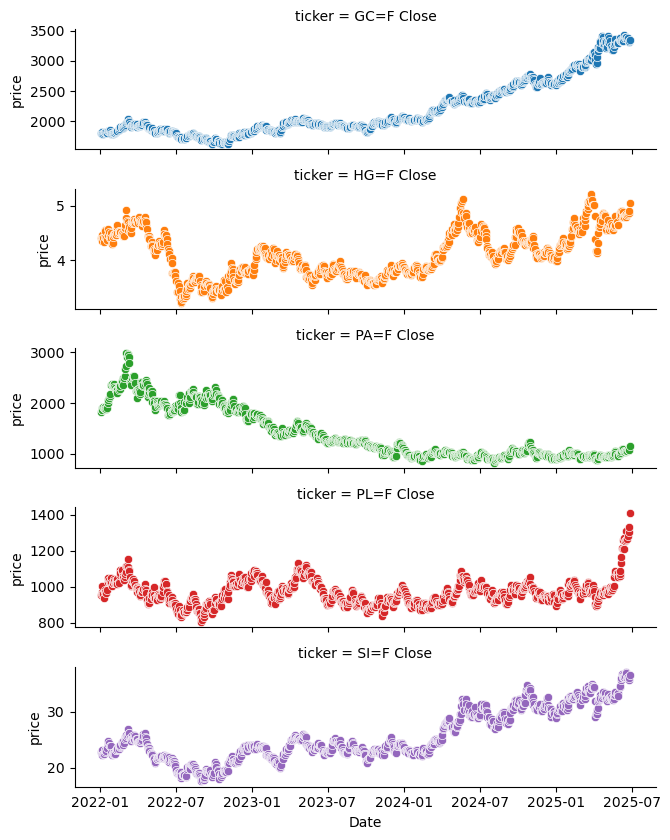

In [65]:
# Plot commodity trends
a = sns.FacetGrid(com_long, row="ticker", hue='ticker', height=1.7, aspect=4,sharey=False)
a.map(sns.scatterplot, "Date", "price")

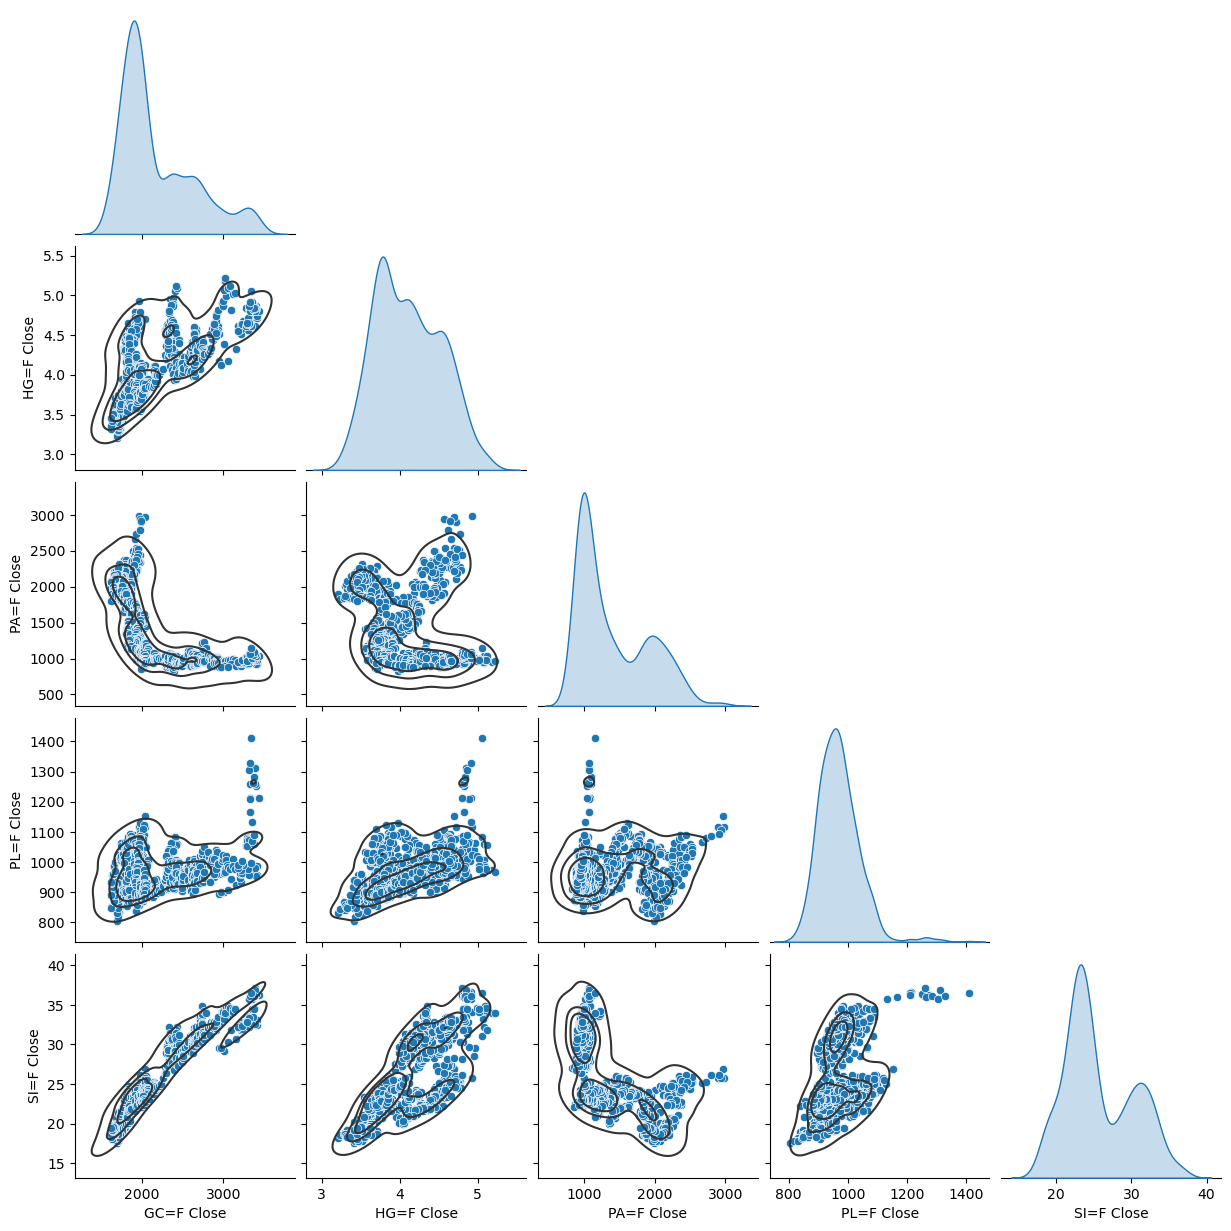

In [78]:
## Visualize relationship among commodites
g = sns.pairplot(commodities.filter(regex="Close"), diag_kind="kde", corner=True)
g.map_lower(sns.kdeplot, levels=4, color=".2")

### Compare Standardized Mineral Prices to Mineral Prices Normalized by Price of First Date

#### Standardization Function:
#### $ z = \frac{(x - \mu)}{\sigma} $

#### Normalize by first price in dataset function:
#### $ z = \frac{Close Price}{First Close Price} $

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.dates as mdates

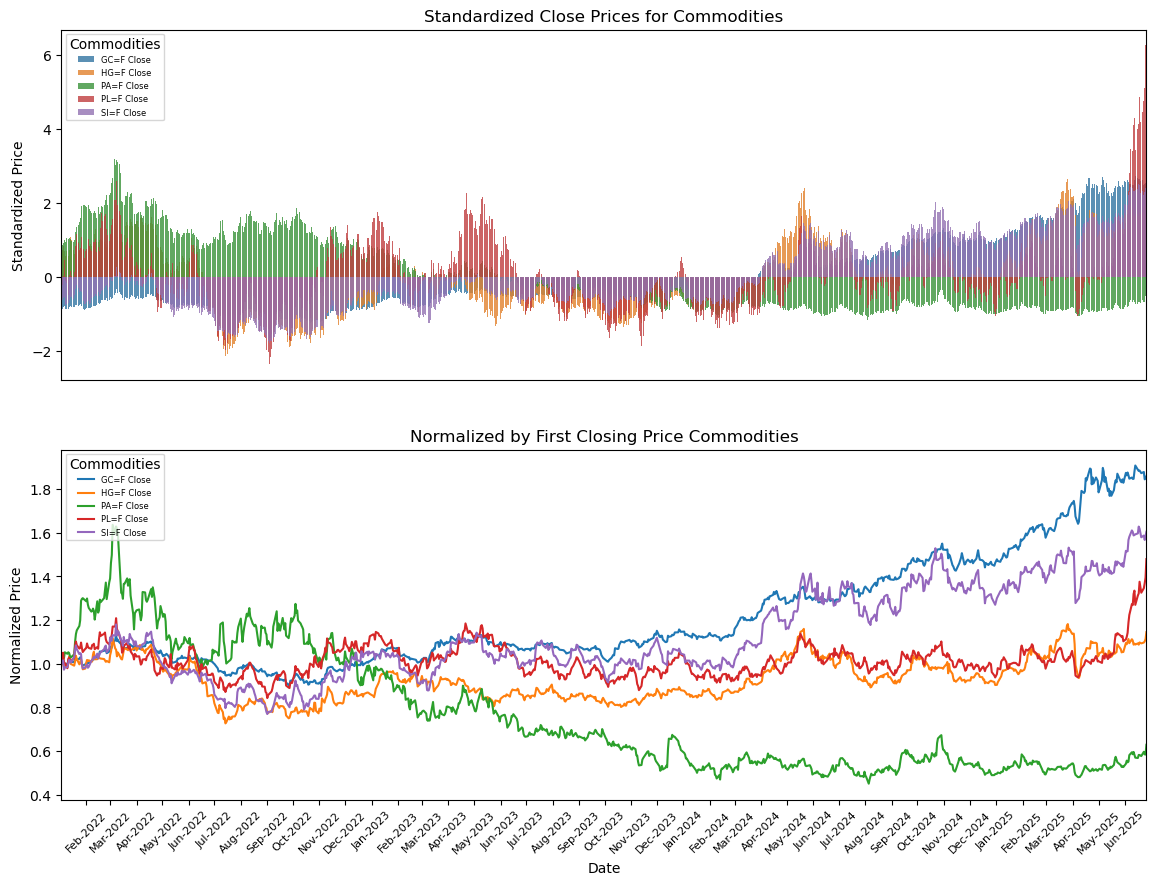

In [ ]:
# Normalize the Close prices by dividing by the first value of each series
commodities_close = commodities[['GC=F Close', 'HG=F Close', 'PA=F Close', 'PL=F Close', 'SI=F Close']].reset_index('Date').copy()

# Normalize each column by dividing by its first value
normalized_commodities = commodities_close.copy()
normalized_commodities.iloc[:,1:] = normalized_commodities.iloc[:,1:] / normalized_commodities.iloc[:,1:].iloc[0]
normalized_commodities_melt = pd.melt(normalized_commodities,id_vars=['Date'],var_name='Ticker',value_name='Normalized Close')

# Normalize Closing Prices

scaler = StandardScaler()
scaled_commodities_close = commodities_close.copy()
scaled_commodities_close.iloc[:,1:] = scaler.fit_transform(scaled_commodities_close.iloc[:,1:])
scaled_commodities_close_melt = pd.melt(scaled_commodities_close,id_vars=['Date'],var_name='Ticker',value_name='Close')


# Plotting the normalized Close prices
fig, axs = plt.subplots(2,1,figsize=(14, 10))

sns.barplot(data=scaled_commodities_close_melt,x='Date',y='Close',hue='Ticker',ax=axs[0],dodge=False,alpha=0.8)

sns.lineplot(data=normalized_commodities_melt,x='Date',y='Normalized Close',hue='Ticker',ax=axs[1])


# Adding title and labels
axs[0].set_title('Standardized Close Prices for Commodities', fontsize=12)
axs[0].set_xticklabels([])
axs[0].set_xticks([]) 
axs[0].set_xlabel('')
axs[0].set_ylabel('Standardized Price', fontsize=10)
axs[0].legend(title="Commodities", loc='upper left',fontsize=6)

# Adding title and labels
axs[1].set_title('Normalized by First Closing Price Commodities', fontsize=12)
axs[1].set_xlabel('Date', fontsize=10)
axs[1].set_ylabel('Normalized Price', fontsize=10)
axs[1].legend(title="Commodities",loc='upper left', fontsize=6)
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))  # Format as 'Jan-2025'
axs[1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Show every 3rd month
axs[1].tick_params(axis='x', rotation=45, labelsize=8)  # Rotate labels
axs[1].set_xlim([normalized_commodities_melt['Date'].min(), normalized_commodities_melt['Date'].max()])



# Show the plot
plt.show()

### Compare Returns and Volatility

1. create returns and volatility dataframes
2. melt dataframes to visualize

In [103]:
# Select only Close columns
closing_prices = commodities.filter(like='Close')

# Calculate returns
returns = closing_prices.pct_change()
returns.columns = [c.replace('Close', 'Returns') for c in closing_prices.columns]

# Calculate rolling volatility
volatility = closing_prices.pct_change().rolling(window=30, min_periods=1).std()
volatility.columns = [c.replace('Close', 'Volatility') for c in closing_prices.columns]

# Add to your dataframe
commodities = pd.concat([commodities, returns, volatility], axis=1)


In [ ]:
## Melt returns
returns = commodities.filter(like='Returns').reset_index().melt(
    id_vars='Date',    
    var_name='ticker',  
    value_name='returns'  
)
returns['ticker'] = returns['ticker'].str.replace(' Returns','')

## Melt volatility
volatility = commodities.filter(regex='Volatility').reset_index().melt(
    id_vars = 'Date',
    var_name = 'ticker',
    value_name = 'volatility'
)
volatility['ticker'] = volatility['ticker'].str.replace(' Volatility','')

## Merge dataframes

returns_volatility = pd.merge(returns,volatility, on=['Date','ticker'])

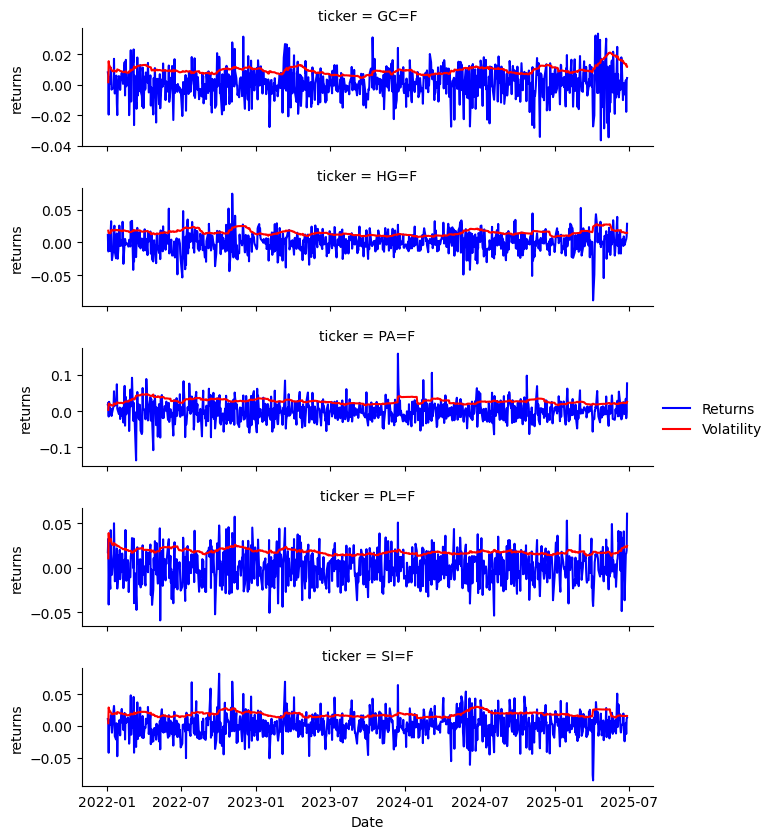

In [121]:
def plot_both(data, color, **kwargs):
    sns.lineplot(data=data, x="Date", y="returns", color='blue', label='Returns', **kwargs)
    sns.lineplot(data=data, x="Date", y="volatility", color='red', label='Volatility', **kwargs)

a = sns.FacetGrid(
    returns_volatility,
    row="ticker",
    height=1.7,
    aspect=4,
    sharey=False
)
a.map_dataframe(plot_both)
a.add_legend()


### Correlation of Commodities

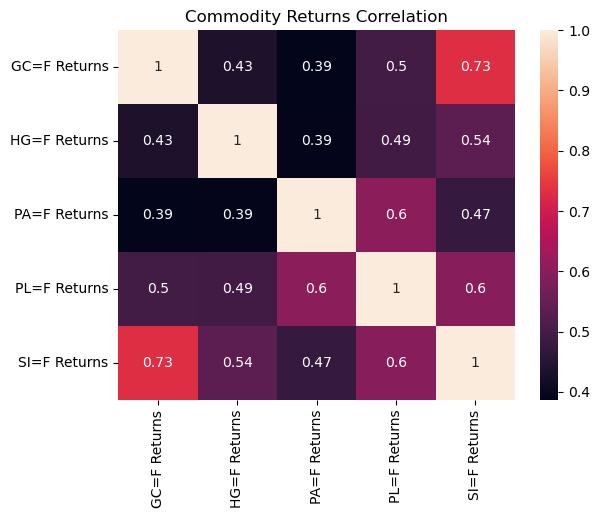

In [131]:
sns.heatmap(commodities.filter(like='Returns').dropna().corr(),annot=True)
plt.title("Commodity Returns Correlation")
plt.show()

### Examine EFFR and DXY

1. minmax scale date to see how and low trends compare
2. plot effr and dxy

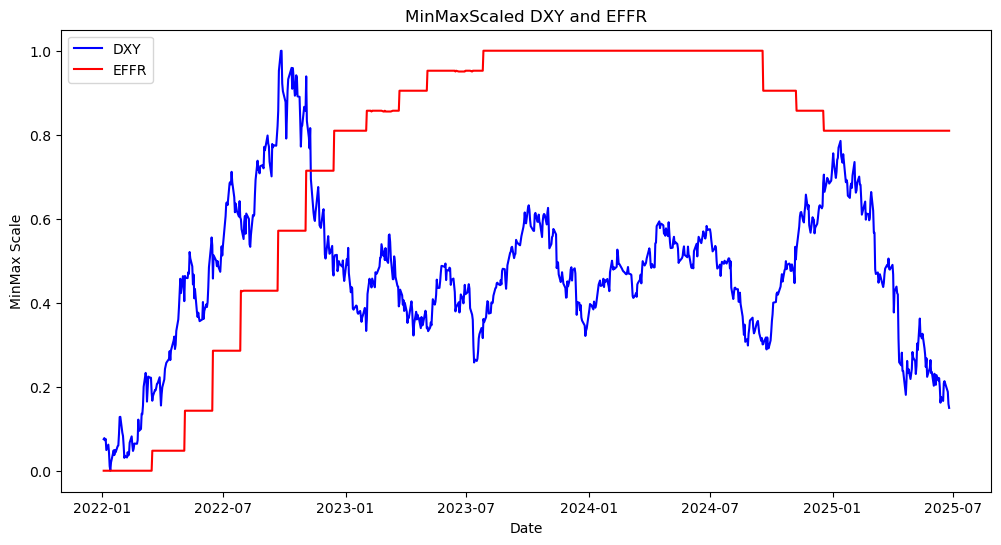

In [70]:
effr_dxy = effr.merge(dxy.filter(like='Close'),on='Date',how='inner')

# scale values to visualize
scaler = MinMaxScaler()
effr_dxy.loc[:, ['dxy_scaled', 'effr_scaled']] = scaler.fit_transform(
    effr_dxy.loc[:, ['DXY Close', 'EFFR']]
)

plt.figure(figsize=(12, 6))


sns.lineplot(data=effr_dxy, x='Date', y='dxy_scaled', color='blue', label='DXY')
sns.lineplot(data=effr_dxy, x='Date', y='effr_scaled', color='red', label='EFFR')


plt.legend(loc='upper left')
plt.ylabel('MinMax Scale')
plt.title('MinMaxScaled DXY and EFFR')
plt.show()


### Examine Relationship between commodities and value stocks

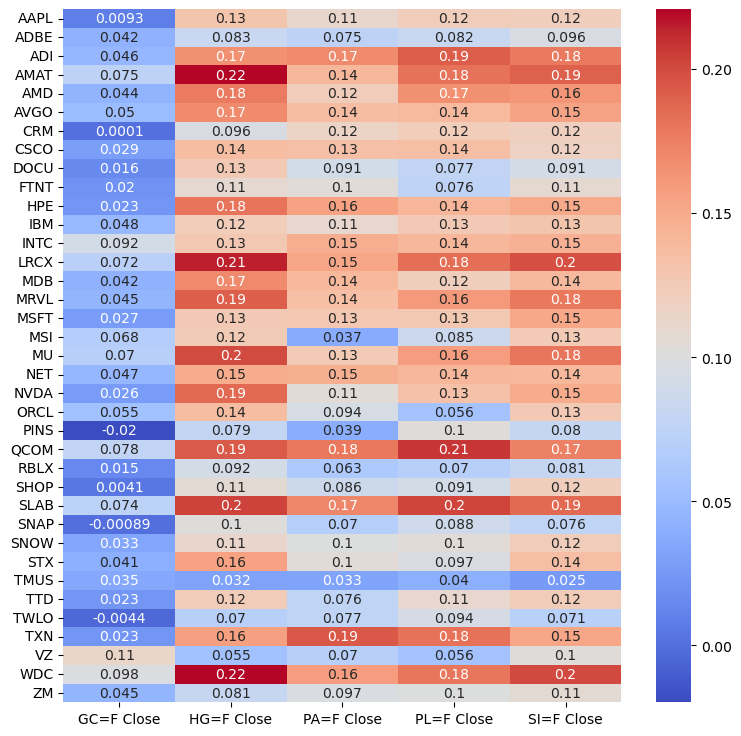

In [282]:
combined = commodities.filter(like='Close').merge(stocks, left_index=True, right_index=True, how='inner')

returns_combined = combined.pct_change().dropna()
corr = returns_combined.corr().loc[stocks.columns.to_list(),closing_prices.columns.to_list()]
plt.figure(figsize=(9,9))
sns.heatmap(corr,annot=True,fmt='0.2g',cmap="coolwarm")
plt.show()

#### low correlations between commodities and value stocks when looking at entire time period

#### let's rank them to see which stocks have the highest correlations

In [173]:
# top ten overall correlations
corr_melt = corr.reset_index(names='stock').melt(
    id_vars='stock',
    var_name='commodity',
    value_name='corr'
).sort_values(by='corr',ascending=False).reset_index(drop=True)
corr_melt.head(10)

,stock,commodity,corr
0,AMAT,HG=F Close,0.220795
1,WDC,HG=F Close,0.220513
2,LRCX,HG=F Close,0.214628
3,QCOM,PL=F Close,0.207719
4,SLAB,HG=F Close,0.203211
5,SLAB,PL=F Close,0.202536
6,WDC,SI=F Close,0.200352
7,MU,HG=F Close,0.200028
8,LRCX,SI=F Close,0.198147
9,TXN,PA=F Close,0.194467


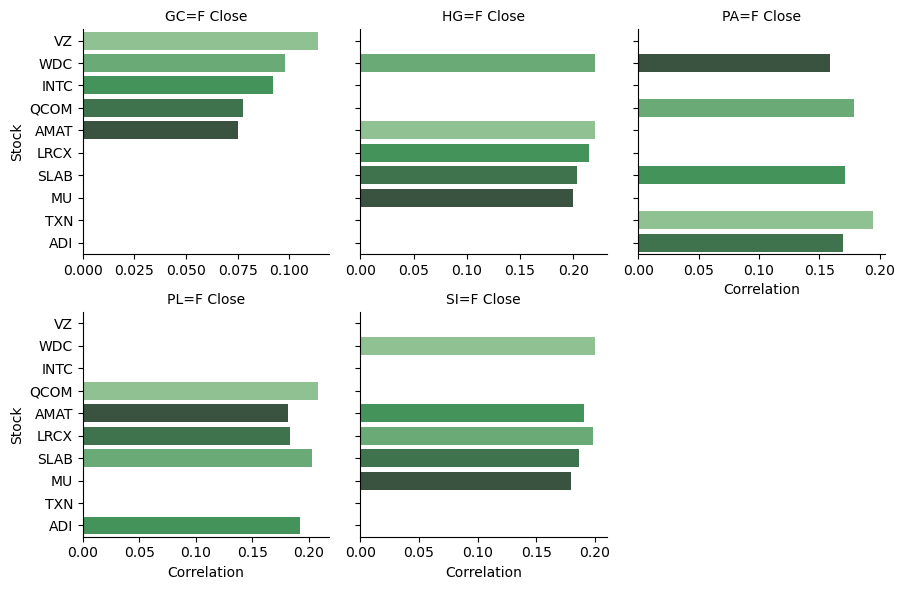

In [285]:
# top 5 by commodity
top5 = corr_melt.groupby('commodity').apply(
    lambda x:x.nlargest(5, 'corr'),
    include_groups=False
).reset_index().drop('level_1',axis=1)
topg = sns.FacetGrid(
    top5,
    col='commodity',
    col_wrap=3,
    sharex=False,
    height=3
)

topg.map_dataframe(
    sns.barplot,
    y='stock',
    x='corr',
    hue='stock',
    dodge=False,
    palette="Greens_d"
)

topg.set_titles("{col_name}")
topg.set_axis_labels("Correlation", "Stock")
topg.add_legend()
plt.show()

It looks like HG=F and SI=F have the same top 5 correlated stocks 

In [192]:
print("Many of the top 5 stocks are consistent across commodities")

print('\n',top5.stock.value_counts())

Many of the top 5 stocks are consistent across commodities

 stock
WDC     4
AMAT    4
SLAB    4
QCOM    3
LRCX    3
MU      2
ADI     2
VZ      1
INTC    1
TXN     1
Name: count, dtype: int64


#### Let's look at some of these interesting stocks that correlate across multiple commodites

In [264]:
def plot_rolling_corr_pairs(df, stock, commodities, window=30):
    """
    Plots rolling correlation and price/return trend
    for each commodity vs. a chosen stock.
    
    Parameters:
    - df: DataFrame with returns or prices
    - stock: string, column name of the stock
    - commodities: list of column names for commodities
    - window: rolling window size
    """
    
    for commodity in commodities:
        fig, axes = plt.subplots(2, 1, figsize=(12, 4), sharex=True)
        
        # Rolling correlation
        rolling_corr = df[commodity].rolling(window).corr(df[stock])
        axes[0].plot(df.index, rolling_corr, label=f'Rolling Corr ({commodity} vs {stock})', color='blue')
        axes[0].axhline(0, ls='--', color='gray')
        axes[0].legend()
        axes[0].set_ylabel('Correlation')
        axes[0].set_title(f'Rolling {window}-Day Correlation: {commodity} vs {stock}')
        
        # returns trend
        axes[1].plot(df.index, df[stock], label=stock, color='orange',alpha=0.9)
        axes[1].plot(df.index, df[commodity], label=commodity, color='green',alpha=0.5)
        axes[1].legend(loc='best',fontsize='xx-small')
        axes[1].set_ylabel('Returns')
        axes[1].set_title(f'{commodity} and {stock} Trends')
        
        plt.tight_layout()
        plt.show()


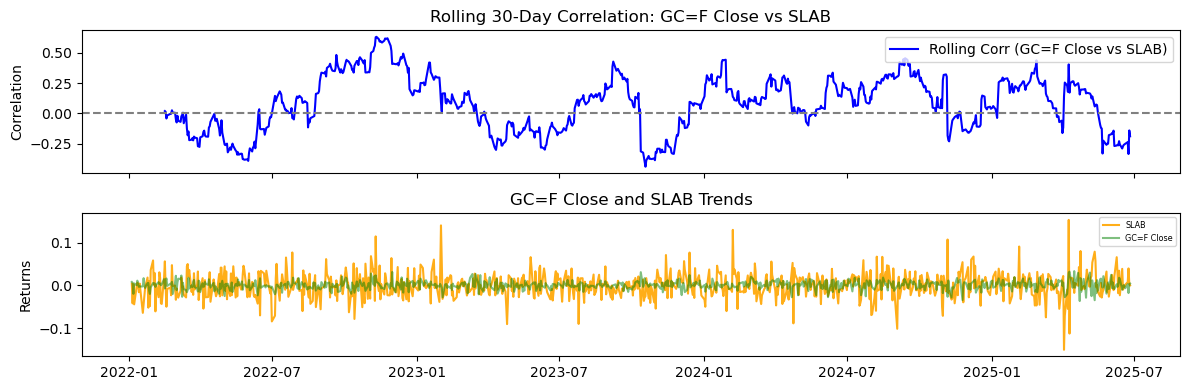

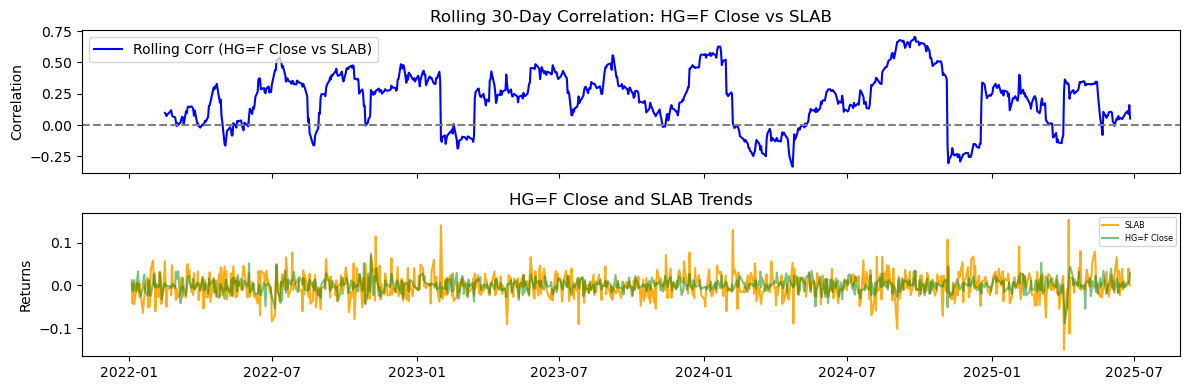

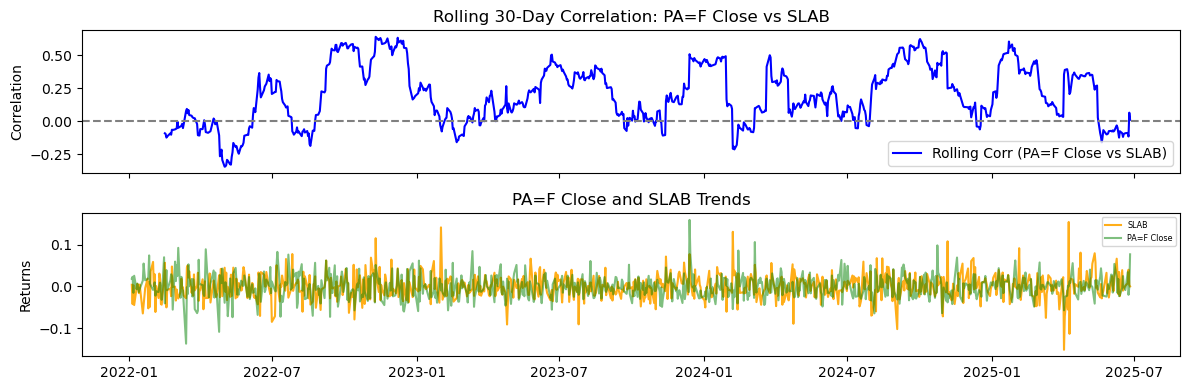

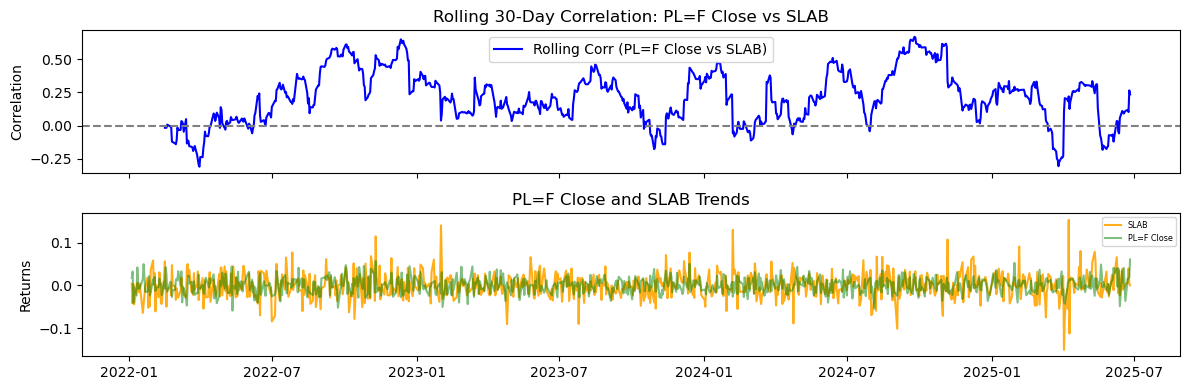

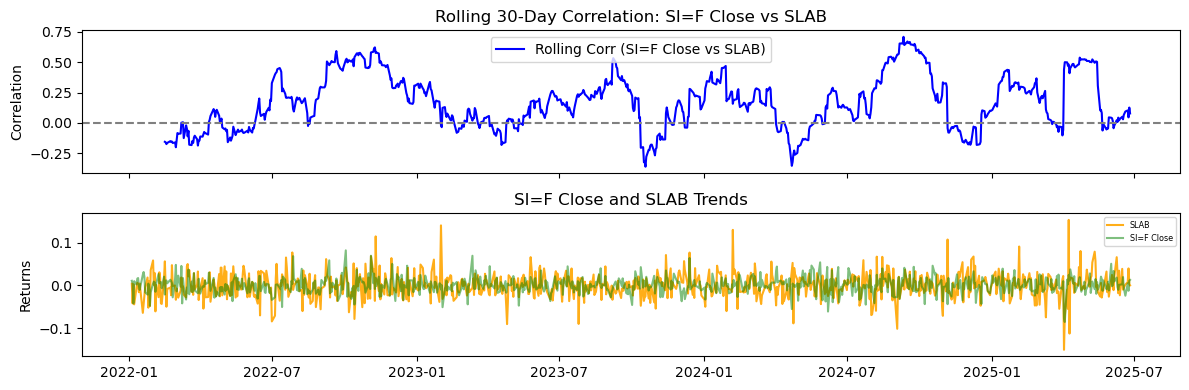

In [273]:
commodities_list = ['GC=F Close', 'HG=F Close', 'PA=F Close', 'PL=F Close', 'SI=F Close'] 
stock_name = 'SLAB'

plot_rolling_corr_pairs(returns_combined, stock_name, commodities_list, window=30)

* view rolling correlation to see if the relationship is strong & stable.

* overlaying raw returns to see if the actual price moves line up with correlations

### Overlay correlations and overlay lagged correlations

In [271]:
def plot_corr_and_lag_overlay(df, stock, commodities, window=30, lag=5):
    """
    Plots two stacked overlays:
    - Rolling correlations of commodities vs stock (no lag)
    - Rolling correlations of commodities vs stock (with lag)
    All in one compact figure.
    """

    fig, axes = plt.subplots(
        2, 1,
        figsize=(14, 6),  
        sharex=True
    )

    # --- Non-lagged overlay ---
    for commodity in commodities:
        rolling_corr = df[commodity].rolling(window).corr(df[stock])
        axes[0].plot(df.index, rolling_corr, label=f'{commodity}', lw=1.5)

    axes[0].axhline(0, ls='--', color='gray', lw=0.8)
    axes[0].set_title(f'Rolling {window}-Day Correlations with {stock}', fontsize=12)
    axes[0].set_ylabel('Corr')
    axes[0].legend(loc='upper right', fontsize=8)
    axes[0].tick_params(axis='both', labelsize=8)

    # --- Lagged overlay ---
    for commodity in commodities:
        shifted = df[commodity].shift(lag)
        rolling_corr = shifted.rolling(window).corr(df[stock])
        axes[1].plot(df.index, rolling_corr, label=f'{commodity} (lag {lag})', lw=1.5)

    axes[1].axhline(0, ls='--', color='gray', lw=0.8)
    axes[1].set_title(f'Rolling {window}-Day Correlations with Lag {lag} vs {stock}', fontsize=12)
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('Corr')
    axes[1].legend(loc='upper right', fontsize=8)
    axes[1].tick_params(axis='both', labelsize=8)

    plt.tight_layout()
    plt.show()


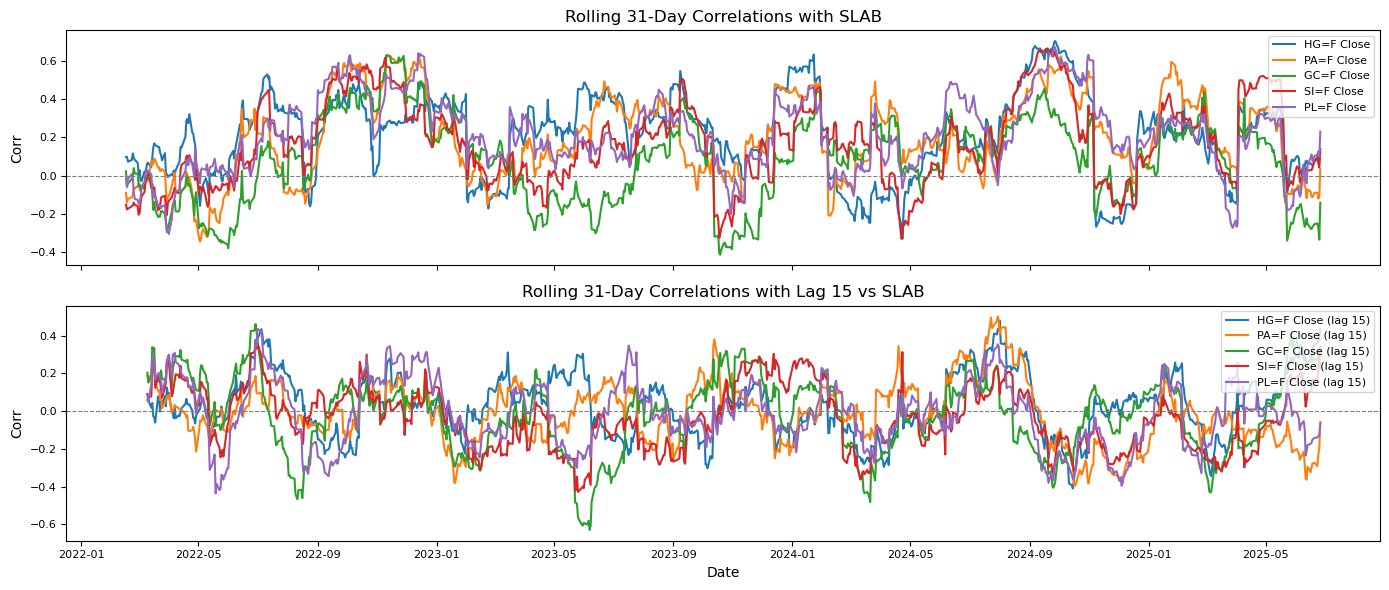

In [290]:
commodities_list = ['HG=F Close', 'PA=F Close', 'GC=F Close', 'SI=F Close', 'PL=F Close']
stock_name = 'SLAB'

plot_corr_and_lag_overlay(
    df=returns_combined,
    stock=stock_name,
    commodities=commodities_list,
    window=31,
    lag=15
)


* Now we have a  raw correlation → baseline in the top panel.

* Same pairs, lagged in the bottom panel to see how much it actually changes.

* If the lag version shifts the whole curve up/down, we may have a potential edge.

## Conclusion

In this notebook, I explored historical commodity and stock price data through a series of visualizations:

* Pairwise scatter plots and correlations

* Rolling correlations and lagged relationships

* Overlayed returns and trends over time

This helped identify potential connections between key commodities and selected stocks, including signs of possible lead-lag relationships.

Based on these findings, the next step is to design signal-generation logic and build a backtesting framework to properly test whether these relationships can be turned into viable trading strategies.